## Import 

In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns

from model import load_features
from config import RESULTS_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [9]:
df = load_features()
df.head()

C:\Users\hp\Financial-volatility-forecasting\src\model.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(DATA_PROCESSED / "processed.csv", index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume,log_return,volatility_20d,abs_return,return_squared,lag_1,lag_5,lag_10,lag_20,rolling_abs_return_mean_20d,target_volatility
Price,,,,,,,,,,,,,,,
Ticker,SPY,SPY,SPY,SPY,SPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-02,24.86638832092285,24.86638832092285,24.485956788892043,24.520541473622117,182400,0.014711,0.132770,0.014711,0.000216,-0.002819,-0.000715,-0.025551,0.007088,0.005358,0.109395
1993-03-03,24.970149993896484,24.987442341537687,24.86639590804927,24.900980603331675,280100,0.004164,0.133243,0.004164,0.000017,0.014711,0.012794,-0.000720,0.002117,0.005460,0.108621
1993-03-04,24.83181381225586,25.004737306770178,24.83181381225586,25.004737306770178,89500,-0.005555,0.129991,0.005555,0.000031,0.004164,0.002117,-0.000720,0.010515,0.005212,0.107371


## Basic info

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 8235 entries, Ticker to 2025-11-11
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Close                        8234 non-null   object 
 1   High                         8234 non-null   object 
 2   Low                          8234 non-null   object 
 3   Open                         8234 non-null   object 
 4   Volume                       8234 non-null   object 
 5   log_return                   8233 non-null   float64
 6   volatility_20d               8233 non-null   float64
 7   abs_return                   8233 non-null   float64
 8   return_squared               8233 non-null   float64
 9   lag_1                        8233 non-null   float64
 10  lag_5                        8233 non-null   float64
 11  lag_10                       8233 non-null   float64
 12  lag_20                       8233 non-null   float64
 13  rolling_abs_

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
log_return,8233.0,0.000404,0.011767,-0.115887,-0.004347,0.000681,0.005932,0.135578
volatility_20d,8233.0,0.158894,0.100586,0.031860,0.095876,0.134419,0.192721,0.939715
abs_return,8233.0,0.007831,0.008791,0.000000,0.002226,0.005333,0.010405,0.135578
return_squared,8233.0,0.000139,0.000506,0.000000,0.000005,0.000028,0.000108,0.018381
lag_1,8233.0,0.000404,0.011767,-0.115887,-0.004347,0.000680,0.005932,0.135578
lag_5,8233.0,0.000404,0.011766,-0.115887,-0.004334,0.000680,0.005932,0.135578
lag_10,8233.0,0.000404,0.011768,-0.115887,-0.004331,0.000680,0.005932,0.135578
lag_20,8233.0,0.000401,0.011767,-0.115887,-0.004331,0.000679,0.005932,0.135578
rolling_abs_return_mean_20d,8233.0,0.007829,0.005021,0.001497,0.004733,0.006510,0.009580,0.050426
target_volatility,8233.0,0.158912,0.100580,0.031860,0.095876,0.134571,0.192721,0.939715


### missing values

In [19]:
df.isna().sum().sort_values(ascending=False)

volatility_20d                 2
log_return                     2
lag_10                         2
lag_5                          2
lag_1                          2
return_squared                 2
abs_return                     2
rolling_abs_return_mean_20d    2
lag_20                         2
target_volatility              2
Open                           1
Close                          1
Volume                         1
High                           1
Low                            1
dtype: int64

## EDA: Visualizing Returns & Volatility

### Visualizing Returns

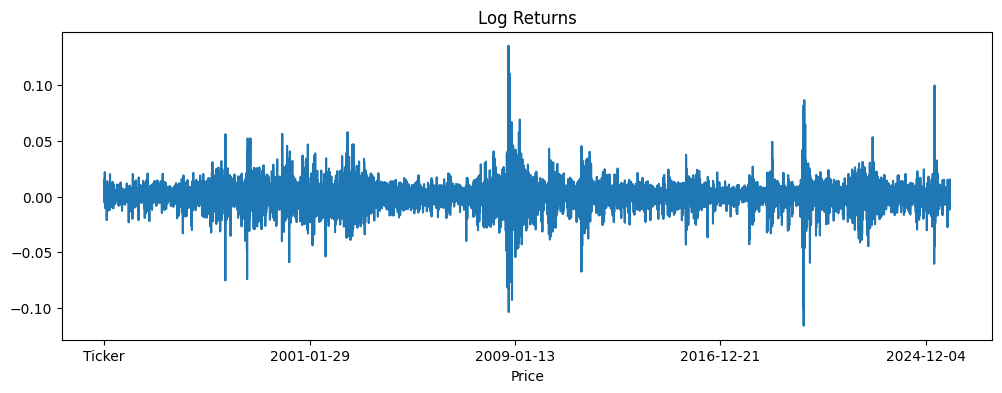

In [24]:
df["log_return"].plot(figsize=(12,4), title="Log Returns")
plt.savefig(f"{RESULTS_DIR}/figures/eda/log_returns.png")

### Volatility clustering

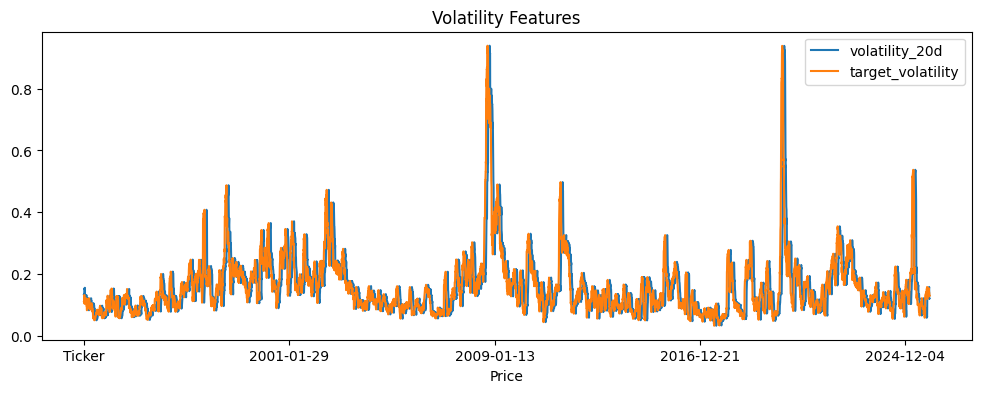

In [25]:
vol_cols = [c for c in df.columns if "volatility" in c]

df[vol_cols].plot(figsize=(12,4))
plt.title("Volatility Features")
plt.savefig(f"{RESULTS_DIR}/figures/eda/volatility_features.png")


<Axes: >

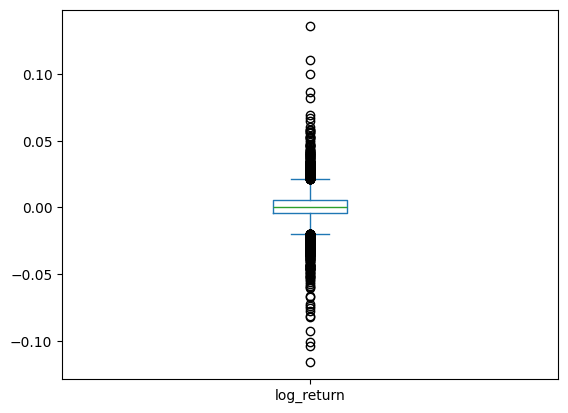

In [22]:
df['log_return'].plot(kind="box")

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['log_return'], lags=50)
plot_pacf(df['log_return'], lags=50)

ModuleNotFoundError: No module named 'statsmodels'

In [1]:
    # Calculate returns
    df['returns'] = df['Close'].pct_change()
    
    # Realized volatility (annualized rolling std)
    # There are roughly 252 trading days in a year.
    df['volatility'] = df['returns'].rolling(window).std() * np.sqrt(252)

    print(df)

NameError: name 'df' is not defined